In [6]:
import pandas as pd
from pathlib import Path
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import sys  
sys.path.insert(0, '../src')

import populations

In [3]:
import matplotlib
fontsize = 14
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [9]:
systems_df = populations.ulx_beamed_l_45()

In [10]:
systems_df

,iidd,idum,Z,tage,m,mdot,is_bh,mdot_gs,LEdd,mdot_Edd,...,r_isco_nospin,r_isco,r_sph,r_out,P_inflow_at_rsph,P_envelope,P_wind,P_inflow_days,P_envelope_days,P_wind_days
3,3805660,-100000,0.0002,10,24.6,36.00,1,2.268994e+21,2.952000e+39,3.936000e+19,...,6.0,1.25,72.059002,1.367081e+04,11.113106,3.999886e+05,3.485596e+07,0.000129,4.629498,4.034255e+02
27,2171293,-120000,0.0002,10,24.6,11.00,1,6.933037e+20,2.952000e+39,3.936000e+19,...,6.0,1.25,22.018028,9.149313e+02,0.396267,6.842400e+02,1.467619e+04,0.000005,0.007919,1.698633e-01
28,4750366,-120000,0.0002,10,8.2,26.00,1,1.638718e+21,9.840000e+38,1.312000e+19,...,6.0,1.25,156.127837,6.333717e+04,32.554561,5.357578e+06,9.921270e+08,0.000377,62.009001,1.148295e+04
37,2415890,-130000,0.0002,10,22.7,430.00,1,2.710187e+22,2.724000e+39,3.632000e+19,...,6.0,1.25,932.746106,2.252886e+06,14308.533627,8.347314e+10,9.296032e+13,0.165608,966124.248722,1.075930e+09
40,6407445,-130000,0.0002,10,13.8,9.50,1,5.987623e+20,1.656000e+39,2.208000e+19,...,6.0,1.25,33.897320,3.219960e+03,0.750650,6.773419e+03,3.022666e+05,0.000009,0.078396,3.498455e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,213203,-70000,0.0020,100,1.3,1.20,0,7.563313e+19,1.560000e+38,2.080000e+18,...,6.0,6.00,218.172485,2.679876e+04,1778.998274,2.684140e+07,1.531714e+09,0.020590,310.664320,1.772817e+04
2937,3060601,-70000,0.0020,100,1.3,0.72,0,4.537988e+19,1.560000e+38,2.080000e+18,...,6.0,6.00,130.903491,8.344963e+03,423.079064,1.719364e+06,5.362503e+07,0.004897,19.900050,6.206600e+02
3796,8386096,-140000,0.0002,200,1.3,0.54,0,3.403491e+19,1.560000e+38,2.080000e+18,...,6.0,6.00,98.177618,3.520531e+03,187.551656,2.411639e+05,4.558038e+06,0.002171,2.791249,5.275507e+01
4073,998543,-10000,0.0002,200,1.3,1.30,0,8.193589e+19,1.560000e+38,2.080000e+18,...,6.0,6.00,236.353525,3.124718e+04,2227.027364,3.892450e+07,2.384751e+09,0.025776,450.515083,2.760129e+04


In [12]:
ls

 15.txt*                         erass_curves.ipynb*
 40.txt*                         erass_process.ipynb*
 ULX_catalogue_sampling.ipynb*   obs_ulx.ipynb*
 bh_ratio_obs.ipynb*             plot_bh_ratio_vs_classification.ipynb*
 curve_processing.ipynb*        'process_erass 7_5_20.ipynb'*
 df_systems.ipynb*


In [13]:
res_df = pd.read_csv('../data/processed/curve_classifications.csv')

In [14]:
res_df

,system_id,theta,dincl,inclination,lc_min,lc_max,N_lim,classification
0,3,12.03,0,0,22.130920,22.130920,0.032583,alive
1,3,12.03,0,1,22.416954,22.416954,0.032583,alive
2,3,12.03,0,2,22.629745,22.629745,0.032583,alive
3,3,12.03,0,3,22.745117,22.745117,0.032583,alive
4,3,12.03,0,4,22.950842,22.950842,0.032583,alive
...,...,...,...,...,...,...,...,...
514873,17261,4.58,45,86,0.000004,0.474002,0.320879,transient
514874,17261,4.58,45,87,0.000004,0.447798,0.320879,transient
514875,17261,4.58,45,88,0.000004,0.410134,0.320879,transient
514876,17261,4.58,45,89,0.000004,0.387256,0.320879,transient


In [198]:
res_df['classification'].value_counts()

transient    238956
alive        172360
dead         103562
Name: classification, dtype: int64

In [199]:
# Total percent a/d/t
res_df['classification'].value_counts() / len(res_df) * 100

transient    46.410218
alive        33.475891
dead         20.113891
Name: classification, dtype: float64

In [15]:
# res_df = res_df[res_df['dincl'] < 30]

In [100]:
res_df['Z'] = res_df['system_id'].map(systems_df['Z'])
res_df['is_bh'] = res_df['system_id'].map(systems_df['is_bh'])
res_df['Lx'] = res_df['system_id'].map(systems_df['Lx'])
res_df['theta'] = res_df['system_id'].map(systems_df['theta_half_deg'])

In [101]:
df_a = res_df[res_df['classification']=='alive']
df_t = res_df[res_df['classification']=='transient']
df_d = res_df[res_df['classification']=='dead']

In [111]:
systems_per_dincl_bin = res_df['dincl'].value_counts().unique()[0]
systems_per_i_bin     = res_df['inclination'].value_counts().unique()[0]

# Number of systems for each dincl
a_dincl_N = df_a['dincl'].value_counts()
t_dincl_N = df_t['dincl'].value_counts()
d_dincl_N = df_d['dincl'].value_counts()

# Number of systems for each inclination
a_i_N = df_a['inclination'].value_counts().sort_index()
t_i_N = df_t['inclination'].value_counts().sort_index()
d_i_N = df_d['inclination'].value_counts().sort_index()

# Percentages
a_dincl_percent = (a_dincl_N/systems_per_dincl_bin * 100)
t_dincl_percent = (t_dincl_N/systems_per_dincl_bin * 100)
d_dincl_percent = (d_dincl_N/systems_per_dincl_bin * 100)

a_i_percent = (a_i_N/systems_per_i_bin * 100).sort_index()
t_i_percent = (t_i_N/systems_per_i_bin * 100)
d_i_percent = (d_i_N/systems_per_i_bin * 100).sort_index()


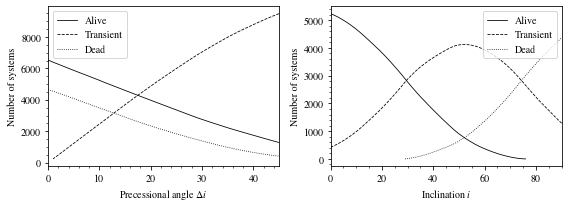

In [118]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,3))

# dincl vs Number systems
a_dincl_N.plot(label='Alive', linestyle='-', color='black', linewidth=0.8, ax=ax[0])
t_dincl_N.plot(label='Transient', linestyle='--', color='black', linewidth=0.8, ax=ax[0])
d_dincl_N.plot(label='Dead', linestyle='dotted', color='black', linewidth=0.8, ax=ax[0])

ax[0].set_xlim(0,max(df_d['dincl']))
ax[0].set_xlabel(r'Precessional angle $\Delta i$')
ax[0].set_ylabel(r'Number of systems')
ax[0].minorticks_on()
ax[0].legend()



# inclination vs Number systems
a_i_N.plot(label='Alive', linestyle='-', color='black', linewidth=0.8, ax=ax[1])
t_i_N.plot(label='Transient', linestyle='--', color='black', linewidth=0.8, ax=ax[1])
d_i_N.sort_index().plot(label='Dead', linestyle='dotted', color='black', linewidth=0.8, ax=ax[1])

ax[1].set_xlim(0,max(df_d['inclination']))
ax[1].set_xlabel(r'Inclination $i$')
ax[1].set_ylabel(r'Number of systems')
ax[1].minorticks_on()
ax[1].legend()


plt.tight_layout()
#plt.savefig('../reports/figures/dincl_i_classifications.png')
#plt.savefig('../reports/figures/dincl_i_classifications.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


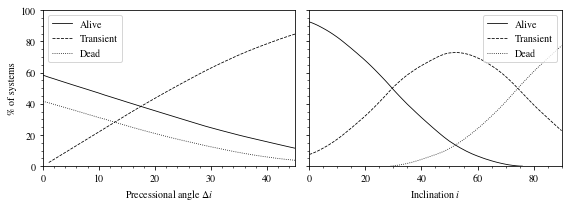

In [119]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,3), sharey=True)

# dincl vs percentages
a_dincl_percent.plot(label='Alive', linestyle='-', color='black', linewidth=0.8, ax=ax[0])
t_dincl_percent.plot(label='Transient', linestyle='--', color='black', linewidth=0.8, ax=ax[0])
d_dincl_percent.plot(label='Dead', linestyle='dotted', color='black', linewidth=0.8, ax=ax[0])

ax[0].set_xlim(0,max(df_d['dincl']))
ax[0].set_ylim(0,100)
ax[0].set_xlabel(r'Precessional angle $\Delta i$')
ax[0].set_ylabel(r'% of systems')
ax[0].minorticks_on()
ax[0].legend()


# inclination vs percentages
a_i_percent.plot(label='Alive', linestyle='-', color='black', linewidth=0.8, ax=ax[1])
t_i_percent.plot(label='Transient', linestyle='--', color='black', linewidth=0.8, ax=ax[1])
d_i_percent.plot(label='Dead', linestyle='dotted', color='black', linewidth=0.8, ax=ax[1])

ax[1].set_xlim(0,max(df_d['inclination']))
ax[1].set_ylim(0,100)
ax[1].set_xlabel(r'Inclination $i$')
ax[1].set_ylabel(r'% of systems')
ax[1].minorticks_on()
ax[1].legend()

plt.tight_layout()
plt.savefig('../reports/figures/dincl_i_classifications_percent.png')
plt.savefig('../reports/figures/dincl_i_classifications_percent.eps')

In [255]:
maximum_alive_inclination = max(a_i_percent.index)
minimum_dead_inclination = min(d_i_percent.index)
print(maximum_alive_inclination)
print(minimum_dead_inclination)

76
29


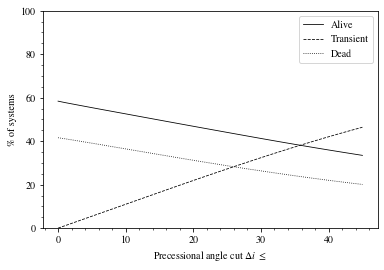

In [239]:
dincls = np.sort(res_df['dincl'].unique())
alives = []
transients = []
deads = []

for dincl in dincls:
    sub = res_df[res_df['dincl'] <= dincl]
    percents = sub['classification'].value_counts() / len(sub) * 100
    
    alives.append(percents['alive'])
    try:
        transients.append(percents['transient'])
    except KeyError:
        transients.append(0)
    deads.append(percents['dead'])

plt.xlabel(r'Precessional angle cut $\Delta i \ \leq $')
plt.ylabel(r'% of systems')

plt.ylim(0,100)
plt.minorticks_on()
plt.plot(dincls, alives, label='Alive', linestyle='-', color='black', linewidth=0.8,)
plt.plot(dincls, transients, label='Transient', linestyle='--', color='black', linewidth=0.8,)
plt.plot(dincls, deads, label='Dead', linestyle='dotted', color='black', linewidth=0.8,)
plt.legend()

In [ ]:
#Possible observables
N_alive
N_transient

N_transient / N_alive

N_transient / (N_alive + N_transient)

In [416]:
piv1 = pd.pivot_table(res_df, columns=['is_bh'], index=['Z', 'classification'], aggfunc='count')
piv1 = piv1.sort_values(by='Z', ascending=False)
piv1 = piv1[piv1.columns[0:2]]

n_ns = piv1[piv1.columns[0]]
n_bh = piv1[piv1.columns[1]]

tot = n_ns+n_bh
piv1['%_NS'] = round(n_ns/tot*100, 2) 
piv1['%_BH'] = round(n_bh/tot*100, 2)
piv1['Total'] = tot

sum_total = piv1.sum()
n_ns_tot = sum_total[0]
n_bh_tot = sum_total[1]
sum_total['%_NS'] = round(n_ns_tot/(n_ns_tot + n_bh_tot)*100, 2) 
sum_total['%_BH'] = round(n_bh_tot/(n_ns_tot + n_bh_tot)*100, 2) 
sum_total = sum_total.rename(('SUM', ''))
piv1 = piv1.append(sum_total)

piv1[piv1.columns[0]] = piv1[piv1.columns[0]].astype('int32')
piv1[piv1.columns[1]] = piv1[piv1.columns[1]].astype('int32')
piv1[piv1.columns[4]] = piv1[piv1.columns[4]].astype('int32')

In [417]:
piv1

Lx           %_NS   %_BH   Total
is_bh                       0       1                      
Z      classification                                      
0.02   alive             4101    1149  78.11  21.89    5250
       dead             13681     968  93.39   6.61   14649
       transient        15706    2069  88.36  11.64   17775
0.002  alive            14770   95942  13.34  86.66  110712
       dead             30977   31161  49.85  50.15   62138
       transient        42159  107313  28.21  71.79  149472
0.0002 alive             3179   53219   5.64  94.36   56398
       dead             10233   16542  38.22  61.78   26775
       transient        11704   60005  16.32  83.68   71709
SUM                    146510  368368  28.46  71.54  514878

In [418]:
print(piv1.to_latex())

\begin{tabular}{llrrrrr}
\toprule
    & {} & \multicolumn{2}{l}{Lx} &   \%\_NS &   \%\_BH &   Total \\
    & is\_bh &       0 & \multicolumn{4}{l}{1} \\
Z & classification &         &         &        &        &         \\
\midrule
0.02 & alive &    4101 &    1149 &  78.11 &  21.89 &    5250 \\
    & dead &   13681 &     968 &  93.39 &   6.61 &   14649 \\
    & transient &   15706 &    2069 &  88.36 &  11.64 &   17775 \\
0.002 & alive &   14770 &   95942 &  13.34 &  86.66 &  110712 \\
    & dead &   30977 &   31161 &  49.85 &  50.15 &   62138 \\
    & transient &   42159 &  107313 &  28.21 &  71.79 &  149472 \\
0.0002 & alive &    3179 &   53219 &   5.64 &  94.36 &   56398 \\
    & dead &   10233 &   16542 &  38.22 &  61.78 &   26775 \\
    & transient &   11704 &   60005 &  16.32 &  83.68 &   71709 \\
SUM &           &  146510 &  368368 &  28.46 &  71.54 &  514878 \\
\bottomrule
\end{tabular}



In [419]:
piv2 = pd.pivot_table(res_df, columns=['is_bh'], index=['classification'], aggfunc='count')
piv2 = piv2[piv2.columns[0:2]]
n_ns = piv2[piv2.columns[0]]
n_bh = piv2[piv2.columns[1]]

tot = n_ns+n_bh
piv2['%_NS'] = round(n_ns/tot*100, 2) 
piv2['%_BH'] = round(n_bh/tot*100, 2)
piv2['Total'] = tot
piv2

Lx           %_NS   %_BH   Total
is_bh               0       1                      
classification                                     
alive           22050  150310  12.79  87.21  172360
dead            54891   48671  53.00  47.00  103562
transient       69569  169387  29.11  70.89  238956

In [420]:
piv2

Lx           %_NS   %_BH   Total
is_bh               0       1                      
classification                                     
alive           22050  150310  12.79  87.21  172360
dead            54891   48671  53.00  47.00  103562
transient       69569  169387  29.11  70.89  238956

In [421]:
print(piv2.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} & \multicolumn{2}{l}{Lx} &   \%\_NS &   \%\_BH &   Total \\
is\_bh &      0 & \multicolumn{4}{l}{1} \\
classification &        &         &        &        &         \\
\midrule
alive          &  22050 &  150310 &  12.79 &  87.21 &  172360 \\
dead           &  54891 &   48671 &  53.00 &  47.00 &  103562 \\
transient      &  69569 &  169387 &  29.11 &  70.89 &  238956 \\
\bottomrule
\end{tabular}



# Looking at Luminosity Distributions

In [422]:
df_a_bh = df_a[df_a['is_bh'] == 1]
df_a_ns = df_a[df_a['is_bh'] == 0]

df_t_bh = df_t[df_t['is_bh'] == 1]
df_t_ns = df_t[df_t['is_bh'] == 0]

df_d_bh = df_d[df_d['is_bh'] == 1]
df_d_ns = df_d[df_d['is_bh'] == 0]


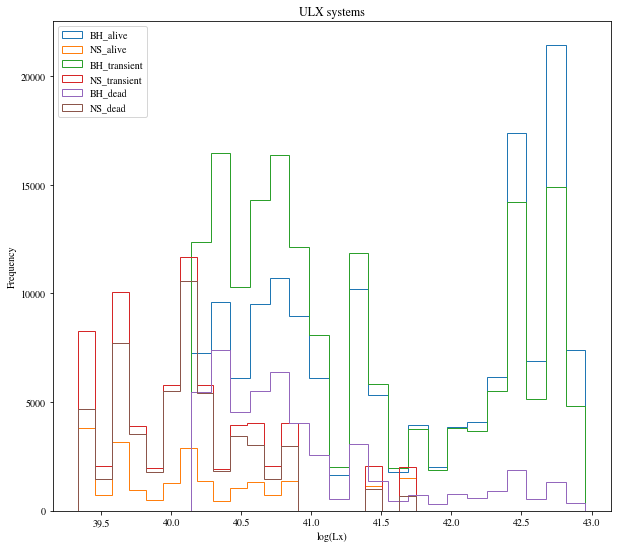

In [423]:
plt.figure(figsize=(10,9))
nbins = 20
plt.title('ULX systems')
plt.xlabel('log(Lx)')
plt.ylabel('Frequency')
np.log10(df_a_bh['Lx']).hist(bins=nbins, label='BH_alive', histtype='step')
np.log10(df_a_ns['Lx']).hist(bins=nbins, label='NS_alive', histtype='step')

np.log10(df_t_bh['Lx']).hist(bins=nbins, label='BH_transient', histtype='step')
np.log10(df_t_ns['Lx']).hist(bins=nbins, label='NS_transient', histtype='step')

np.log10(df_d_bh['Lx']).hist(bins=nbins, label='BH_dead', histtype='step')
np.log10(df_d_ns['Lx']).hist(bins=nbins, label='NS_dead', histtype='step')
plt.grid(b=None)
plt.legend()

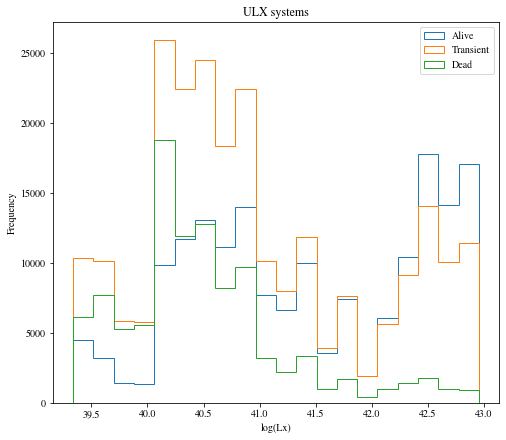

In [424]:
plt.figure(figsize=(8,7))

plt.title('ULX systems')
plt.xlabel('log(Lx)')
plt.ylabel('Frequency')
np.log10(res_df_a['Lx']).hist(bins=20, label='Alive', histtype='step')
np.log10(res_df_t['Lx']).hist(bins=20, label='Transient', histtype='step')
np.log10(res_df_d['Lx']).hist(bins=20, label='Dead', histtype='step')
plt.grid(b=None)
plt.legend()

In [425]:
b42 =res_df[res_df['Lx'] < 1E42]
b41 =res_df[res_df['Lx'] < 1E41]
b40 =res_df[res_df['Lx'] < 1E40]

b42_alive = b42[b42['classification']=='alive']
b41_alive = b41[b41['classification']=='alive']
b40_alive = b40[b40['classification']=='alive']


b42_transient = b42[b42['classification']=='transient']
b41_transient = b41[b41['classification']=='transient']
b40_transient = b40[b40['classification']=='transient']

b42_dead = b42[b42['classification']=='dead']
b41_dead = b41[b41['classification']=='dead']
b40_dead = b40[b40['classification']=='dead']



Text(0.5, 0, 'inclination')

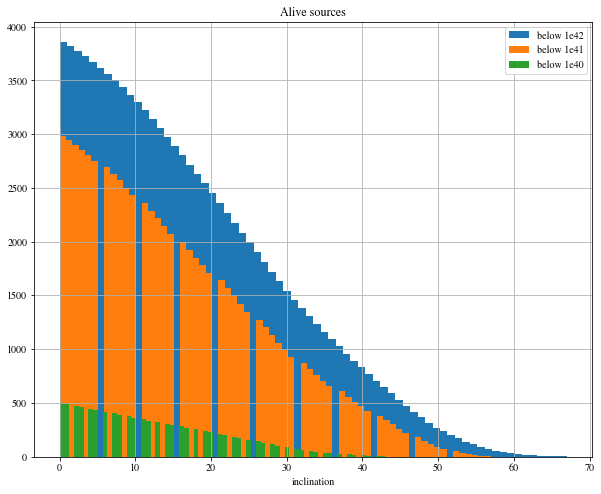

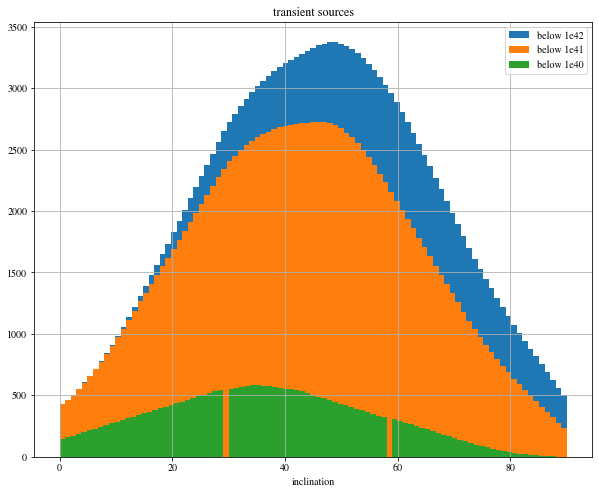

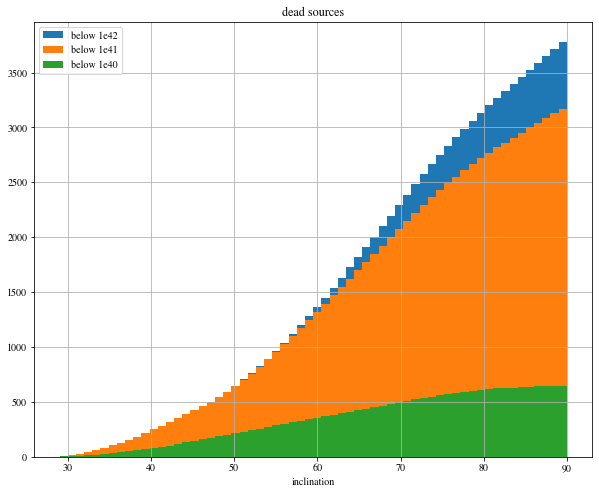

In [426]:
nbins_a = len(np.unique(b42_alive['inclination']))
nbins_t = len(np.unique(b42_transient['inclination']))
nbins_d = len(np.unique(b42_dead['inclination']))


plt.figure(figsize=(10,8))
plt.title('Alive sources')
b42_alive['inclination'].hist(bins=nbins_a, label='below 1e42')
b41_alive['inclination'].hist(bins=nbins_a, label='below 1e41')
b40_alive['inclination'].hist(bins=nbins_a, label='below 1e40')
plt.legend()
plt.xlabel('inclination')



plt.figure(figsize=(10,8))
plt.title('transient sources')
b42_transient['inclination'].hist(bins=nbins_t, label='below 1e42')
b41_transient['inclination'].hist(bins=nbins_t, label='below 1e41')
b40_transient['inclination'].hist(bins=nbins_t, label='below 1e40')


plt.legend()
plt.xlabel('inclination')

plt.figure(figsize=(10,8))
plt.title('dead sources')
b42_dead['inclination'].hist(bins=nbins_d, label='below 1e42')
b41_dead['inclination'].hist(bins=nbins_d, label='below 1e41')
b40_dead['inclination'].hist(bins=nbins_d, label='below 1e40')


plt.legend()
plt.xlabel('inclination')